# Regression


Notebook created for Regression in Psychology [PSYCH–GA.2229](https://docs.google.com/document/d/10AW7g92O6BtX61kXVIkHtL4j_k3P_G5f/edit?usp=sharing&ouid=100340169590558171318&rtpof=true&sd=true) graduate level course at New York University by [Dr. Madalina Vlasceanu](https://www.mvlasceanu.com/)

This content is Open Access (free access to information and unrestricted use of electronic resources for everyone).

Sources:
- Navarro, D. (2013). Learning statistics with R: https://learningstatisticswithr.com/
- Gureckis, 2018
https://teaching.gureckislab.org/fall22/labincp/intro.html

Linear regression is the standard tool for analyzing the relation between interval scale predictors (IVs) and interval scale outcomes (DVs).
Formula for a straight line: y=mx+c
- m is slope of the line
- if you change x by 1 unit, y changes by m units
- c is the y-intercept of the line
- c is also the value of y when x=0

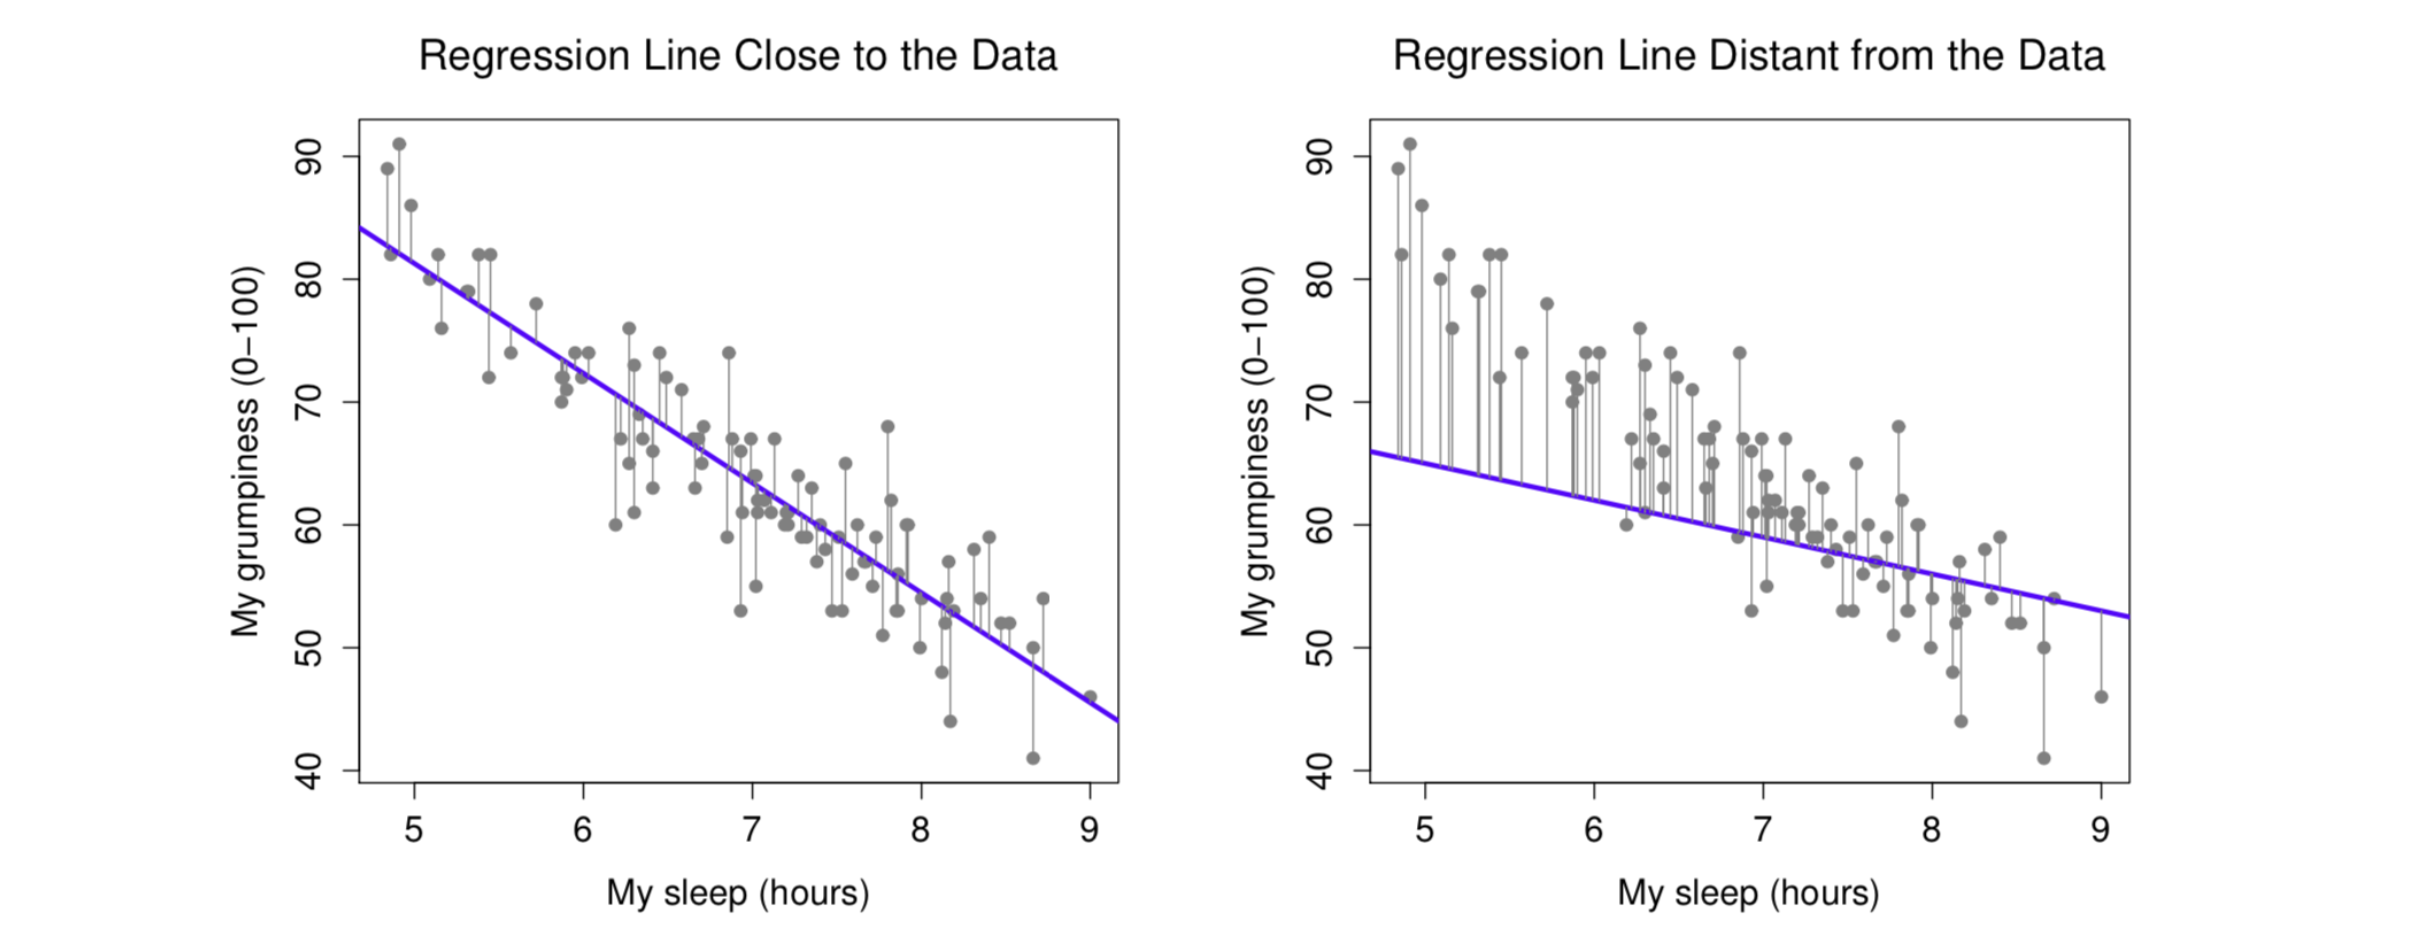

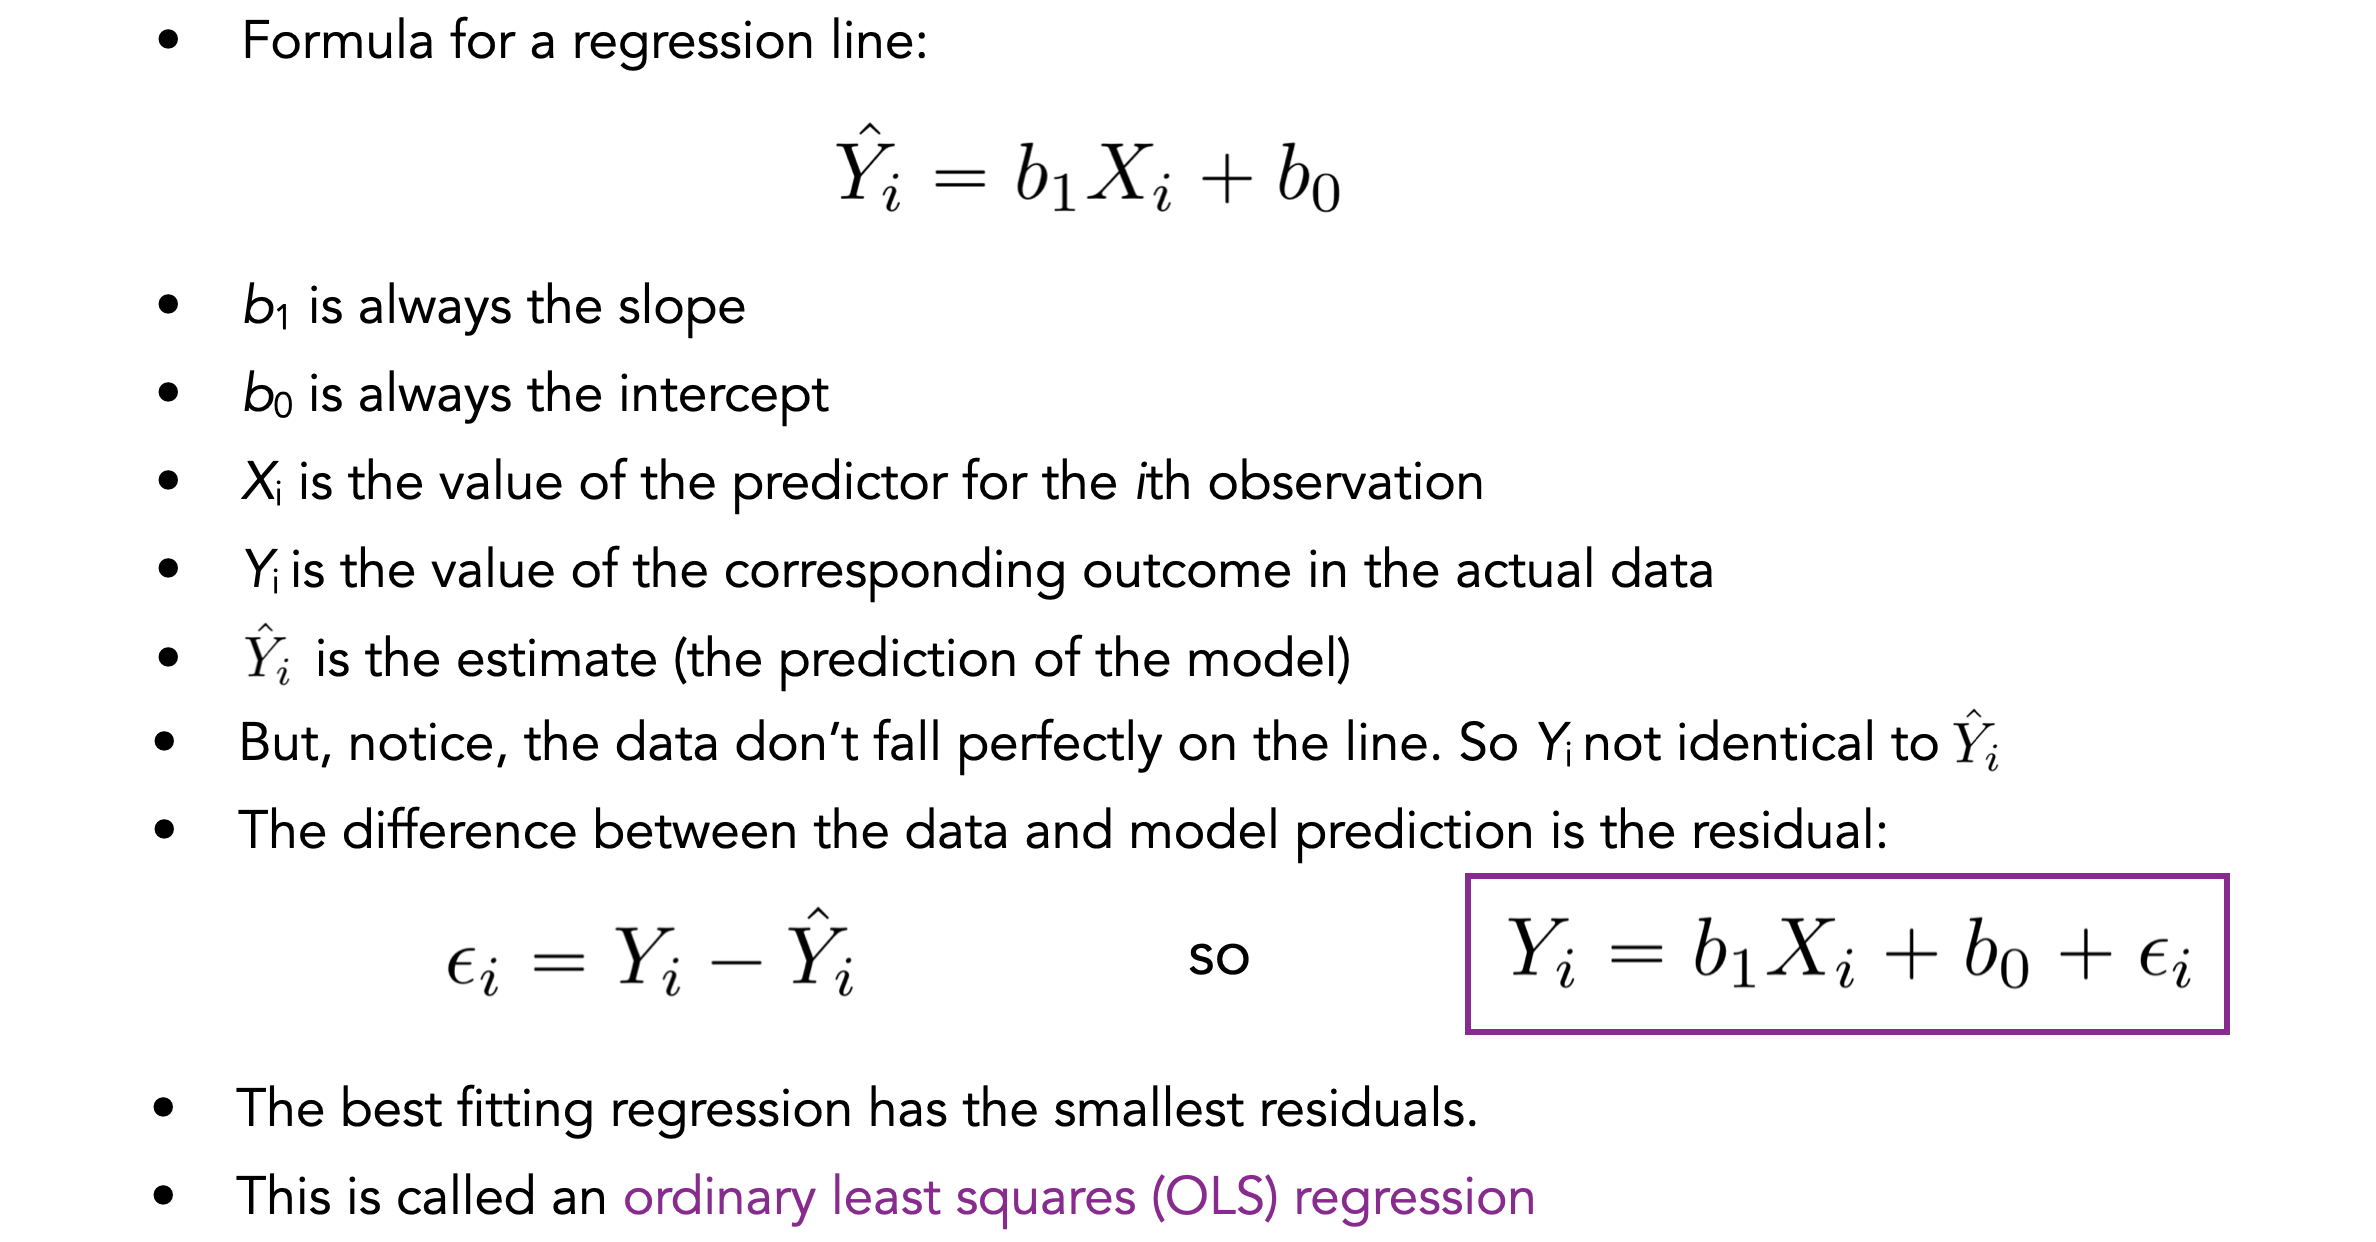

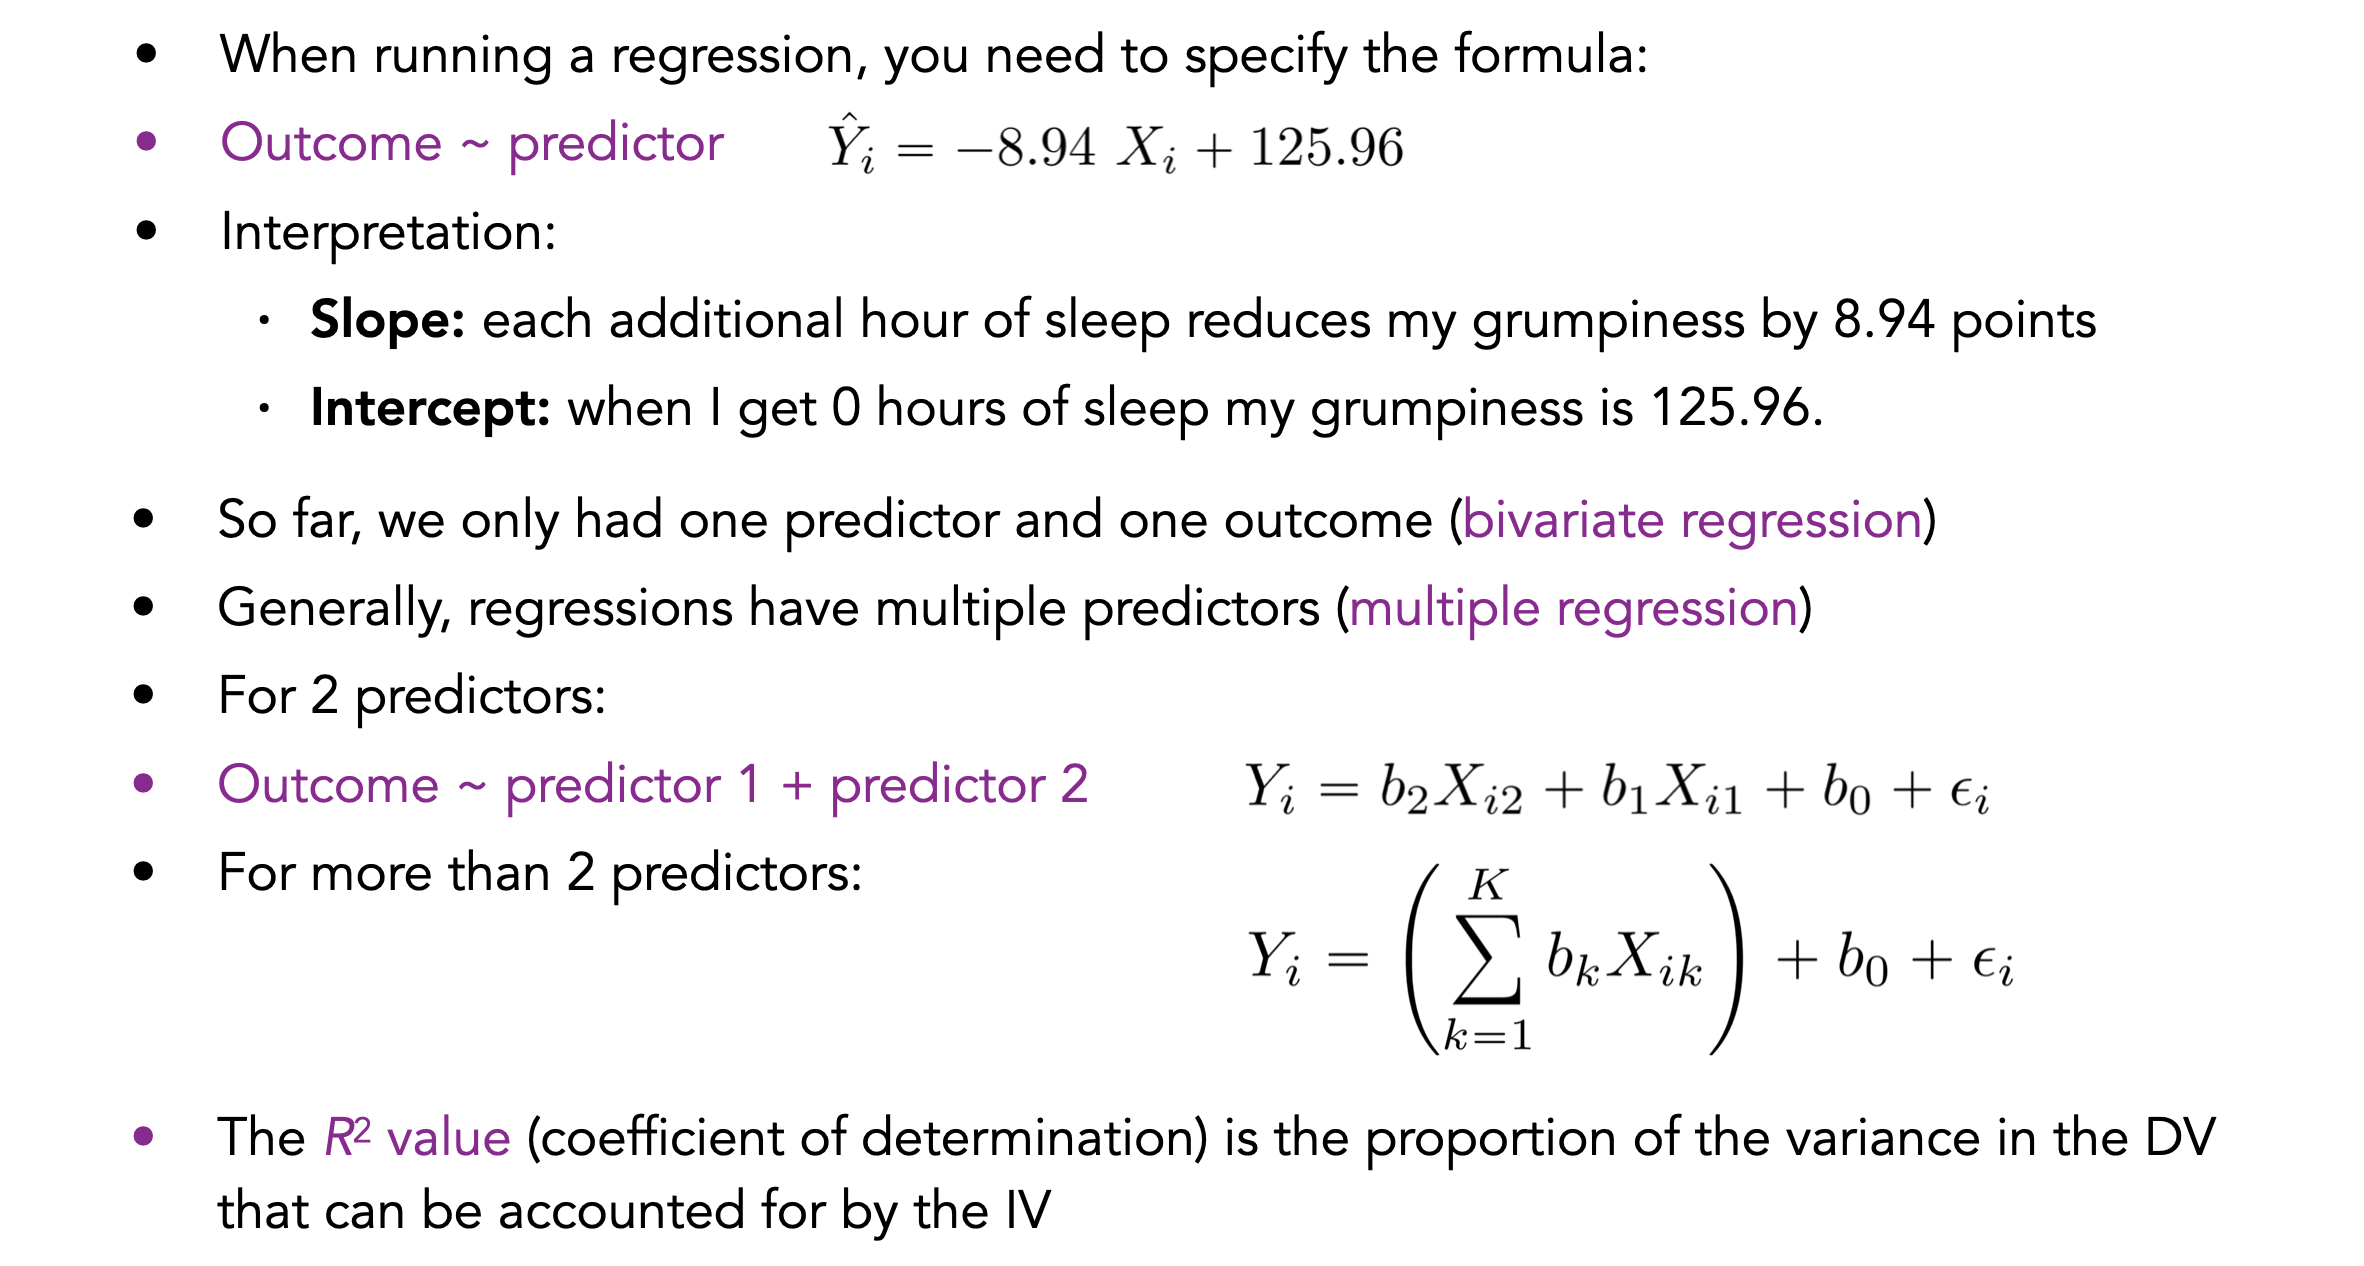

Hypothesis tests for regression models:
1. Does the regression model perform better than a null model?
2. Is a particular regression coefficient different from 0?

In [48]:
# import libraries

import numpy as np
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn import linear_model
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy.stats import bartlett
from statsmodels.stats import diagnostic as diag
from patsy.contrasts import Sum

In [49]:
# import data downloaded from https://github.com/mvlasceanu/RegressionData/blob/main/data.xlsx
# df = pd.read_excel('data.xlsx')

# Or you can read the Excel file directly from the URL
url = 'https://github.com/mvlasceanu/RegressionData/raw/main/data.xlsx'
df = pd.read_excel(url)

df

,Response ID,GENDER,AGE,PARTY,TWITTER,TRUST,RU1,RU2,RU3,RU4,...,Post23,Post24,Post25,Post26,Post27,Post28,Post29,Post30,Post31,Post32
0,R_0cj5dsJg2wfpiuJ,1,18,1,0,95,4.0,26,0,-5,...,69,60,20,58,84,22,42,77,90,71
1,R_0rkhLjwWPHHjnTX,0,19,2,1,76,-5.0,16,3,-1,...,58,82,38,61,36,40,62,68,46,43
2,R_10BMNpjhInMfUeO,1,18,1,1,86,-5.0,-2,5,5,...,35,46,39,65,44,42,53,55,45,35
3,R_120iGR6WlLnbZnI,0,22,1,0,95,23.0,-10,-40,22,...,14,76,20,61,87,82,63,19,97,37
4,R_12qW8cDY0bNlId2,0,19,3,0,76,18.0,-12,1,16,...,17,81,31,83,82,76,43,33,82,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,R_xapQxguTwA3Juh3,1,18,1,0,76,-13.0,3,3,-32,...,56,69,2,68,68,61,71,17,82,27
196,R_XMS13V10vkvYag9,1,18,3,0,76,-12.0,5,-7,-4,...,44,44,26,40,34,37,35,65,44,35
197,R_ykkxJ7f40bzTEaZ,1,19,1,0,89,-3.0,14,14,-13,...,57,23,26,83,44,44,66,35,32,75
198,R_ZDXFN47SOcbCJpv,0,21,2,0,100,10.0,15,-3,5,...,33,29,66,77,64,69,24,23,81,24


## Ordinary least squares (OLS) Regression

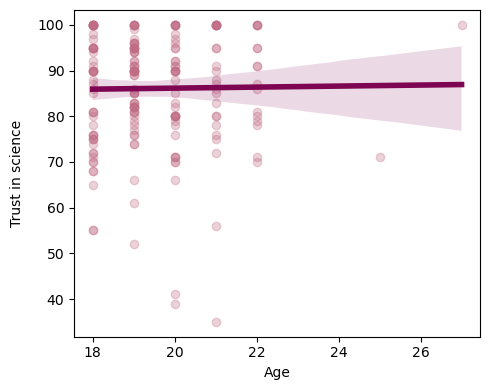

In [50]:
# Make a simple regression plot

# Create the figure
fig, ax = plt.subplots(1,1, figsize=(5,4))

# Plot the line
sns.regplot(x=df.AGE, y=df.TRUST, scatter_kws={"color": "#C06C84","alpha":.3}, \
                                  line_kws={"color":"#7D0552","alpha":1,"lw":4}, ax=ax)

# Label the x and y axis
ax.set_ylabel('Trust in science', labelpad=10)
ax.set(xlabel='Age')

# Include this command such that all the elements of the plot appear in the figure
plt.tight_layout()

# Save figure
# plt.savefig('figure.tif', dpi=300, format="tiff")

In [51]:
# Run a linear regression (OLS) using age to predict trust in science

md = smf.ols("TRUST ~ AGE", df)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                  TRUST   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.03188
Date:                Fri, 12 Jan 2024   Prob (F-statistic):              0.858
Time:                        13:57:00   Log-Likelihood:                -785.74
No. Observations:                 200   AIC:                             1575.
Df Residuals:                     198   BIC:                             1582.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.9158     12.237      6.858      0.0

Report regression result:

"Age was not a significant predictor of trust in science β=0.11, SE=0.62, t(198)=0.179, p=0.858."

Other important interpretations from this OLS output:
- Age explains 0% (this is the R squared value) of the variance of trust in science
- the intercept (here 83.9) is the value of trust in science (y) when age (x) is 0

(60.0, 100.0)

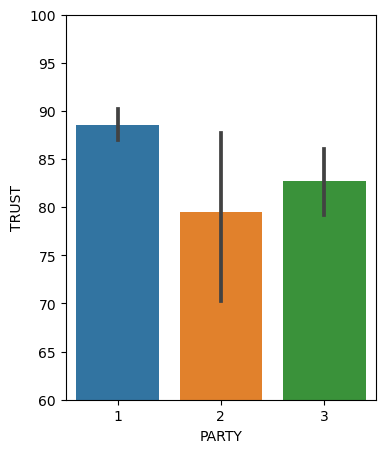

In [52]:
fig, ax = plt.subplots(1,1, figsize=(4,5))
sns.barplot(x=df.PARTY, y=df.TRUST, ax=ax)
plt.ylim(60,100)

In [53]:
# Run a multiple linear regression (OLS) using age and gender and party affiliation to predict trust in science in the same model

md = smf.ols("TRUST ~ C(PARTY)", df)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                  TRUST   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     8.174
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           0.000389
Time:                        13:57:00   Log-Likelihood:                -777.79
No. Observations:                 200   AIC:                             1562.
Df Residuals:                     197   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        88.5906      1.057     83.812

Important interpretations from this OLS output:
- Political party explains 7% (this is the R squared value) of the variance of trust in science
- the F statistic (and its associated p value) are testing the entire model against the null hypohtesis that nothing you included as predictors in this model explains any variance of the Outcome variable (DV, here trust in science)

- the intercept (here 88.5) is the value of trust in science (y) when Party takes on the baseline (or first, in order) value (here the first value of party is 1, which codes for Democrats); you can also see this in the plot above;
- the coefficients of the other two party categories are now the differences from the baseline one; so for Party==2 (which means Republican) the mean is 88.5 mius 9.11; then all the statistics that follow are those of an independent sample t-test, testing the difference between the baseline mean (trust in science of Democrats) and this mean (trust in science of Republicans);
- the same logic applies for Party==3, which is also being compared to the baseline (here baseline is Party==1 or Democrats).
- if you want to change the baseline, simply dummy code another level of this variable to be first (either numerically or alphabetically)

## Ordinary least squares (OLS) Multiple Regression

In [54]:
# Run a multiple linear regression (OLS) using age and gender and party affiliation to predict trust in science in the same model

md = smf.ols("TRUST ~ AGE + C(GENDER) + C(PARTY)", df)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                  TRUST   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     4.321
Date:                Fri, 12 Jan 2024   Prob (F-statistic):            0.00227
Time:                        13:57:00   Log-Likelihood:                -777.27
No. Observations:                 200   AIC:                             1565.
Df Residuals:                     195   BIC:                             1581.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         91.1421     13.105      6.

In this multiple regression above, we are testing the effects of age (as a continuous variable), gender (categorical), and party (categorical) on trust in science. We use plus sign indicating we only care about main effects, no interactions yet.
Now, the intercept represents the value of trust in science (y) when all the predictors are 0 (x==0) – that is, when gender takes on the first value (here the first is 0, which means "men"), and party takes on the first value (here the first is 1 which means "Democrat"), and age is 0 - in other words, the intercept here tells you that for Democratic men, the best fit regression line between age and trust in scinece intersects the x=0 line at 91.14.
This interpretation is not always meaningful.

In [55]:
# Run a multiple linear regression (OLS) using age and gender and party affiliation to predict trust in science in the same model

md = smf.ols("TRUST ~ AGE + C(GENDER)", df)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                  TRUST   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.07964
Date:                Fri, 12 Jan 2024   Prob (F-statistic):              0.923
Time:                        13:57:00   Log-Likelihood:                -785.68
No. Observations:                 200   AIC:                             1577.
Df Residuals:                     197   BIC:                             1587.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         85.9607     13.535      6.

Report result:

"In a multiple linear regression model with trust in science as the DV (outcome), and age, gender, and political party affiliation as the IVs (predictors), we found no significant differences between men and women in trust in science (p=0.33), and no significant effect of age on trust in science (p=0.92); however we did find a significant difference between democrats and republicans, such that republicans trust in science significantly less than democrats (β=–9.35, SE=2.82, t(195)=–3.31, p<0.001), and a significant difference between Democrats and Independents, such that independents also trust in science significantly less than Democrats (β=–6.21, SE=1.98, t(195)=–3.12, p=0.002)."

## Interaction // Moderation

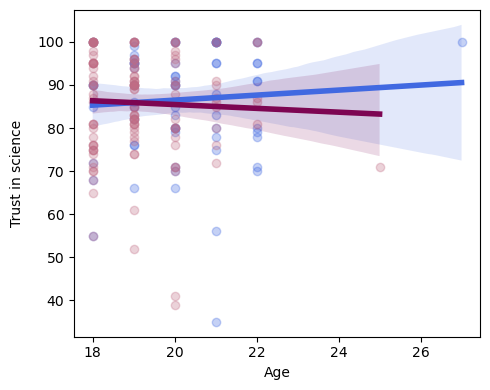

In [56]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

#plot age predicting trust in science but only for men (gender==0)
sns.regplot(x=df.query('GENDER == 0')['AGE'], y=df.query('GENDER == 0')['TRUST'], scatter_kws={"color": "#4169E1","alpha":.3}, \
                                  line_kws={"color":"#4169E1","alpha":1,"lw":4}, ax=ax)

#plot age predicting trust in science but only for women (gender==1)
sns.regplot(x=df.query('GENDER == 1')['AGE'], y=df.query('GENDER == 1')['TRUST'], scatter_kws={"color": "#C06C84","alpha":.3}, \
                                  line_kws={"color":"#7D0552","alpha":1,"lw":4}, ax=ax)
ax.set_ylabel('Trust in science', labelpad=10)
ax.set(xlabel='Age')
plt.tight_layout()

In [57]:
# Run a linear regression (OLS) using age as it interacts with gender to predict trust in science

md = smf.ols("TRUST ~ AGE*C(GENDER)", df)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                  TRUST   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.2475
Date:                Fri, 12 Jan 2024   Prob (F-statistic):              0.863
Time:                        13:57:01   Log-Likelihood:                -785.38
No. Observations:                 200   AIC:                             1579.
Df Residuals:                     196   BIC:                             1592.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             74.8330     19

Reporting result:

"In a multiple linear regression with age and gender as predictors and trust in science as the outcome variable, we found no main effect of gender (p=0.46), no main effect of age (p=0.55), and no gender by age interaction (p=0.44)."

## Example 2

In [58]:
# import data downloaded from https://github.com/mvlasceanu/RegressionData/blob/main/dataB.xlsx
# df2 = pd.read_excel('dataB.xlsx')

# Or you can read the Excel file directly from the URL
url = 'https://github.com/mvlasceanu/RegressionData/raw/main/dataB.xlsx'
df2 = pd.read_excel(url)

df2

,Bchange,Cchange,IncDec,BeliefPOST,ChoicePOST,BeliefPRE,ChoicePRE,partnum
0,10.75,2.5,1,75.50,16.25,64.75,13.75,1
1,35.00,7.5,1,100.00,25.00,65.00,17.50,2
2,8.75,0.0,1,99.75,25.00,91.00,25.00,3
3,40.75,5.0,1,87.25,20.00,46.50,15.00,4
4,0.00,0.0,1,48.25,25.00,48.25,25.00,5
...,...,...,...,...,...,...,...,...
361,-17.25,0.0,0,25.00,10.00,42.25,10.00,179
362,-57.50,-15.0,0,4.25,0.00,61.75,15.00,180
363,-25.00,-25.0,0,25.00,0.00,50.00,25.00,181
364,-40.50,-25.0,0,16.75,0.00,57.25,25.00,182


<Axes: xlabel='Bchange', ylabel='Cchange'>

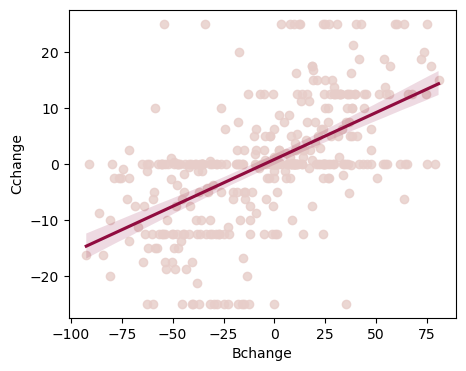

In [59]:
# Create the figure of belief change predicting choice change
fig, ax = plt.subplots(1,1, figsize=(5,4))

# Plot the line
sns.regplot(x=df2.Bchange, y=df2.Cchange, scatter_kws={"color": "#E7CDC9"}, line_kws={"color":"#900C3F"}, ax=ax)

In [60]:
# Run a linear regression (OLS) using belief change and belief at pretest and their interaction to predict choice change

md = smf.ols("Cchange ~ Bchange", df2)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                Cchange   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     170.8
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           2.89e-32
Time:                        13:57:01   Log-Likelihood:                -1336.1
No. Observations:                 366   AIC:                             2676.
Df Residuals:                     364   BIC:                             2684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7632      0.492      1.552      0.1

In [61]:
# Run a linear regression (OLS) using belief change and belief at pretest and their interaction to predict choice change

md = smf.ols("Cchange ~ Bchange*BeliefPRE", df2)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                Cchange   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.42
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           4.04e-32
Time:                        13:57:01   Log-Likelihood:                -1331.2
No. Observations:                 366   AIC:                             2670.
Df Residuals:                     362   BIC:                             2686.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.3702      1.89

Reporting result:

"In a multiple linear regression with belief change and belief at pretest as predictors and choice change as the outcome variable, we found a main effect of belief change (β=0.28, SE=0.04, t(362)=6.91, p<0.001), a non-significant main effect of belief at pretest (p=0.17), and a significant belief change by belief at pretest interaction (β=–0.001, SE=0.001, t(362)=–2.89, p=0.004)"

Interpretation: the slope of belief change on choice change changes as belief at pretest changes - such that the higher belief at pretest is, the less belief change predicts behavioral change.

In [62]:
# add a variable to the dataframe called "BeliefPRE_ms" that stores the median split of the "BeliefPRE" continuous variable

df2['BeliefPRE_ms'] = (df2.BeliefPRE > df2.BeliefPRE.median()).astype(float)
df2

,Bchange,Cchange,IncDec,BeliefPOST,ChoicePOST,BeliefPRE,ChoicePRE,partnum,BeliefPRE_ms
0,10.75,2.5,1,75.50,16.25,64.75,13.75,1,1.0
1,35.00,7.5,1,100.00,25.00,65.00,17.50,2,1.0
2,8.75,0.0,1,99.75,25.00,91.00,25.00,3,1.0
3,40.75,5.0,1,87.25,20.00,46.50,15.00,4,0.0
4,0.00,0.0,1,48.25,25.00,48.25,25.00,5,0.0
...,...,...,...,...,...,...,...,...,...
361,-17.25,0.0,0,25.00,10.00,42.25,10.00,179,0.0
362,-57.50,-15.0,0,4.25,0.00,61.75,15.00,180,1.0
363,-25.00,-25.0,0,25.00,0.00,50.00,25.00,181,0.0
364,-40.50,-25.0,0,16.75,0.00,57.25,25.00,182,0.0


<Axes: xlabel='Bchange', ylabel='Cchange'>

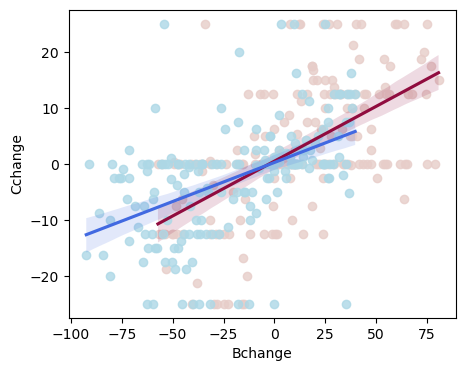

In [63]:
# Create the figure of belief change predicting choice change
fig, ax = plt.subplots(1,1, figsize=(5,4))

# Plot the line of belief change predicting choice change but only for the initially low pretest beliefs (BeliefPRE_ms==0)
sns.regplot(x=df2.query('BeliefPRE_ms==0')['Bchange'], y=df2.query('BeliefPRE_ms==0')['Cchange'], scatter_kws={"color": "#E7CDC9"}, line_kws={"color":"#900C3F"}, ax=ax)

# Plot the line of belief change predicting choice change but only for the initially high pretest beliefs (BeliefPRE_ms==1)
sns.regplot(x=df2.query('BeliefPRE_ms==1')['Bchange'], y=df2.query('BeliefPRE_ms==1')['Cchange'], scatter_kws={"color": "#ADD8E6"}, line_kws={"color":"#4169E1"}, ax=ax)

In [64]:
# Now run the same linear regression as before, but now use belief change and the median split of the belief at pretest to predict choice change

md = smf.ols("Cchange ~ Bchange*C(BeliefPRE_ms)", df2)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                Cchange   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     58.60
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           6.67e-31
Time:                        13:57:02   Log-Likelihood:                -1334.1
No. Observations:                 366   AIC:                             2676.
Df Residuals:                     362   BIC:                             2692.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [65]:
# Now run the same linear regression as before, but now use belief change and the median split of the belief at pretest to predict choice change

md = smf.ols("Cchange ~ Bchange:C(BeliefPRE_ms)", df2)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                Cchange   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     88.11
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           6.41e-32
Time:                        13:57:02   Log-Likelihood:                -1334.1
No. Observations:                 366   AIC:                             2674.
Df Residuals:                     363   BIC:                             2686.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [66]:
# if you want to get the main effects of each of the slopes in the interaction you can run the regression for only those data:

# create new dataframes that only store the rows for which BeliefPRE_ms is 0; name that dataframe "df_pre_low"
df_pre_low = df2.loc[df2.BeliefPRE_ms==0]

# create new dataframes that only store the rows for which BeliefPRE_ms is 1; name that dataframe "df_pre_high"
df_pre_high = df2.loc[df2.BeliefPRE_ms==1]

# run the regression only on the df_pre_low dataframe (which only stores the datapoints corresponding to low initial pretest beliefs according to the median split)
md = smf.ols("Cchange ~ Bchange", df_pre_low)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                Cchange   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     89.72
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           1.47e-17
Time:                        13:57:02   Log-Likelihood:                -679.44
No. Observations:                 184   AIC:                             1363.
Df Residuals:                     182   BIC:                             1369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4516      0.753      0.600      0.5

In [67]:
# run the regression only on the df_pre_high dataframe (which only stores the datapoints corresponding to high initial pretest beliefs according to the median split)

md = smf.ols("Cchange ~ Bchange", df_pre_high)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                Cchange   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     55.62
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           3.59e-12
Time:                        13:57:02   Log-Likelihood:                -653.68
No. Observations:                 182   AIC:                             1311.
Df Residuals:                     180   BIC:                             1318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2203      0.753      0.293      0.7

From this plot, it looks like the red line is steeper, so belief change predicts choice change more for initially low pretest beliefs compared to initially high pretest beliefs. Let's see if this difference in slopes is significant:

Reporting result:

"In a multiple linear regression with belief change and belief at pretest (median split) as predictors and choice change as the outcome variable, we found a main effect of belief change (β=0.19, SE=0.02, t(362)=9.93, p<0.001), a non-significant main effect of belief at pretest (p=0.82), and a significant belief change by belief at pretest interaction (β=–0.05, SE=0.02, t(362)=–2.01, p=0.044)"

Interpretation: Belief change predicts choice change less for high pretest beliefs than for low pretest beliefs. Conversly, belief change predicts choice change more for low pretest beliefs than for high pretest beliefs, same conclusion we drew from the plot.

## Regression assumptions

1. Normality. Residuals are normally distributed. It’s ok if the IV and DV are non-normal, as long as the residuals ε are normal.

2. Linearity. The relationship between the IV and DV is linear.

3. Homogeneity of variance. Each residual is generated from a normal distribution with mean 0 and the same standard deviation σ.

4. Uncorrelated predictors. If you include highly correlated IVs in the model it will cause collinearity problems.

5. Residuals are independent of each other (there’s nothing funny going on in the residuals, like a dependency).

6. No bad outliers. Ensure the model is not too strongly driven by one or two weird datapoints.

In [68]:
# Run a linear regression (OLS) using belief change to predict choice change

md = smf.ols("Cchange ~ Bchange", df2)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                Cchange   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     170.8
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           2.89e-32
Time:                        13:57:02   Log-Likelihood:                -1336.1
No. Observations:                 366   AIC:                             2676.
Df Residuals:                     364   BIC:                             2684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7632      0.492      1.552      0.1

### 1. Normality of residuals

<Axes: >

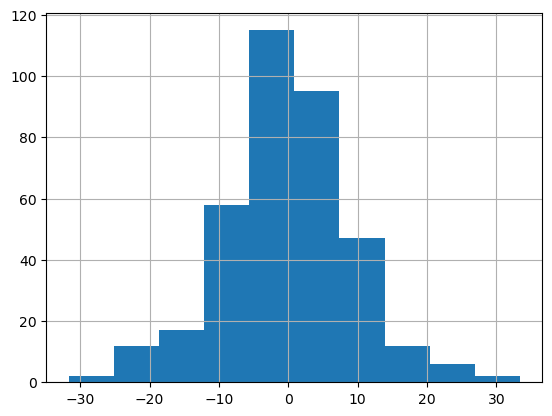

In [69]:
# plot a histogram of the residuals, does it look normal?

mdf.resid.hist()

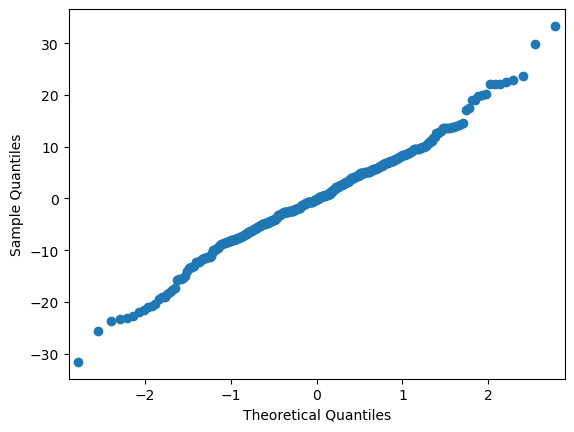

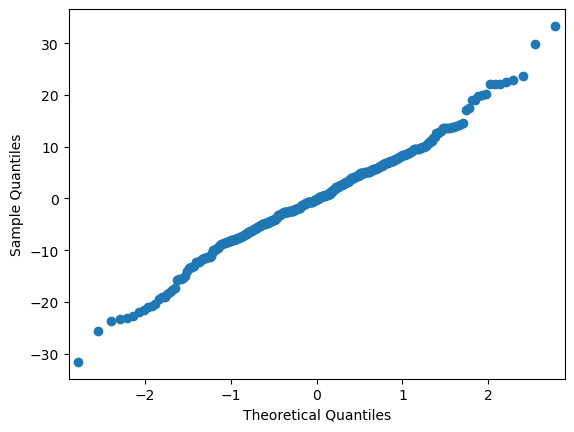

In [70]:
# make QQ plot to visually check if the model residuals are normally distributed
# if normally distributed, the output should be a straight diagonal line

sm.qqplot(mdf.resid)

In [71]:
# quantitatively test whether a variable is normally distributed using the Shapiro test
# if this test is significant, then the variable is not normally distributed

shapiro_test = stats.shapiro(mdf.resid)
shapiro_test

ShapiroResult(statistic=0.9885302186012268, pvalue=0.00559960724785924)

However, given the central limit theorem (CLT), at large sample sizes the normality assumption can be relaxed. In general, larger N is required when the errors depart more from normality (Pek, Wong, & Wong, 2018).

If however, you still want to account for this assumption, you can run a robust regression that accounts for outliers.

In [72]:
# Run a robust linear model

rlm_model = sm.RLM(df2.Cchange, df2.Bchange, M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit()
rlm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                Cchange   No. Observations:                  366
Model:                            RLM   Df Residuals:                      365
Method:                          IRLS   Df Model:                            0
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 12 Jan 2024                                         
Time:                        13:57:02                                         
No. Iterations:                    14                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Bchange        0.1601      0.012     13.668      0.000       0.137       0.183
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### 2. Linearity of relationship


In [73]:
# check the correlation between the IV and DV.
# if high correlation, then relationship is likely linear

stats.pearsonr(df2.Cchange, df2.Bchange)

PearsonRResult(statistic=0.5650943589337774, pvalue=2.8890137778694925e-32)

<Axes: xlabel='Bchange', ylabel='Cchange'>

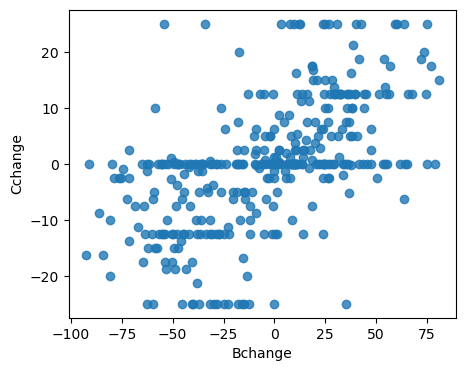

In [74]:
# also visually inspect the relationship

fig, ax = plt.subplots(1,1, figsize=(5,4))
sns.regplot(x=df2.Bchange, y=df2.Cchange, fit_reg=False, ax=ax)

In [75]:
# if you suspect a quadratic relationship rather than a linear one, you can add a quadratic term to the regression
# the quadratic model is better than the linear if the AIC is lower

md = smf.ols("Cchange ~ Bchange + np.power(Bchange, 2)", df2)
mdf = md.fit()
print(mdf.summary())

                            OLS Regression Results                            
Dep. Variable:                Cchange   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     87.13
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           1.24e-31
Time:                        13:57:02   Log-Likelihood:                -1334.7
No. Observations:                 366   AIC:                             2675.
Df Residuals:                     363   BIC:                             2687.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0660 

<Axes: xlabel='Bchange', ylabel='Cchange'>

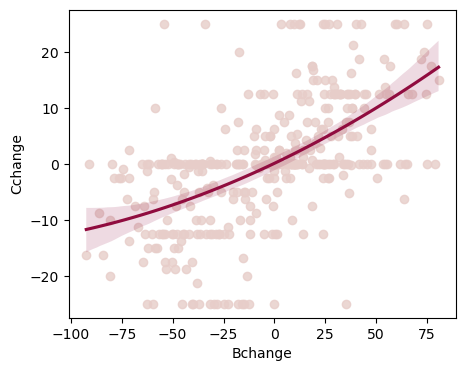

In [76]:
# how to plot a polinomial regression if you suspect a nonlinear relationship:
# if you think the relationship is quadratic, then include "order=2" in the the same regplot you ran for the linear plot

fig, ax = plt.subplots(1,1, figsize=(5,4))
sns.regplot(x=df2.Bchange, y=df2.Cchange, scatter_kws={"color": "#E7CDC9"}, line_kws={"color":"#900C3F"}, order=2, ax=ax)

<Axes: xlabel='Bchange', ylabel='Cchange'>

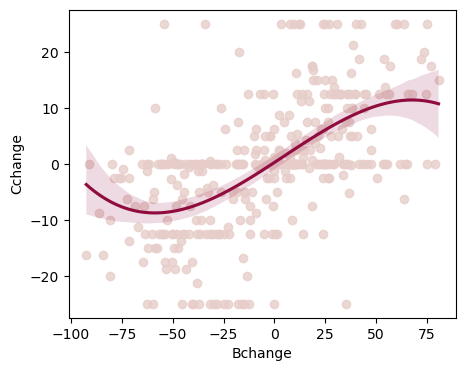

In [77]:
# if you think the relationship is cubic, then include "order=3" in the the same regplot you ran for the linear plot

fig, ax = plt.subplots(1,1, figsize=(5,4))
sns.regplot(x=df2.Bchange, y=df2.Cchange, scatter_kws={"color": "#E7CDC9"}, line_kws={"color":"#900C3F"}, order=3, ax=ax)

### 3. Homogeneity of variance (Homoscedasticity)

Each residual is generated from a normal distribution with mean 0 and the same standard deviation σ.

In [78]:
# check if the mean of the residuals is 0
mdf.resid.mean()

-4.08465004382309e-14

In [79]:
# Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances.
# if p value is less than 0.05 (significant Bartlett’s test), then the homogeneity of variance assumption is violated

test = bartlett(mdf.predict(df2.Bchange), mdf.resid)
print(test)

BartlettResult(statistic=48.00931580909055, pvalue=4.241988854393965e-12)


In [80]:
# because the homogeneity of variance assumption is violated, run a weighted least squares regression (WLS) instead of OLS

md = smf.wls("Cchange ~ Bchange", df2)
mdf = md.fit()
print(mdf.summary())

                            WLS Regression Results                            
Dep. Variable:                Cchange   R-squared:                       0.319
Model:                            WLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     170.8
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           2.89e-32
Time:                        13:57:04   Log-Likelihood:                -1336.1
No. Observations:                 366   AIC:                             2676.
Df Residuals:                     364   BIC:                             2684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7632      0.492      1.552      0.1

In [81]:
# if homogeneity of variance assumption is violated and the predictors are correlated (next assumption), run Generalised Least Squares (GLS) instead:

md = smf.gls("Cchange ~ Bchange", df2)
mdf = md.fit()
print(mdf.summary())

                            GLS Regression Results                            
Dep. Variable:                Cchange   R-squared:                       0.319
Model:                            GLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     170.8
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           2.89e-32
Time:                        13:57:04   Log-Likelihood:                -1336.1
No. Observations:                 366   AIC:                             2676.
Df Residuals:                     364   BIC:                             2684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7632      0.492      1.552      0.1

### 4. Uncorrelated predictors.

If you include highly correlated IVs in the model it will cause collinearity problems.


In regression, multicollinearity refers to the extent to which independent variables are correlated. Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

In [82]:
# check for correlations in dataset's variables
df2.corr()

,Bchange,Cchange,IncDec,BeliefPOST,ChoicePOST,BeliefPRE,ChoicePRE,partnum,BeliefPRE_ms
Bchange,1.000000,5.650944e-01,7.447363e-01,0.887377,6.268325e-01,-0.488485,-1.032877e-02,-1.404242e-02,-0.399439
Cchange,0.565094,1.000000e+00,5.961577e-01,0.525261,7.320123e-01,-0.230979,-4.983383e-01,2.107908e-16,-0.224576
IncDec,0.744736,5.961577e-01,1.000000e+00,0.718686,6.902457e-01,-0.254355,2.595167e-02,7.276463e-16,-0.240441
BeliefPOST,0.887377,5.252611e-01,7.186860e-01,1.000000,6.553656e-01,-0.031176,8.293742e-02,2.936198e-02,-0.039111
ChoicePOST,0.626833,7.320123e-01,6.902457e-01,0.655366,1.000000e+00,-0.118587,2.258781e-01,-3.159923e-17,-0.115700
BeliefPRE,-0.488485,-2.309786e-01,-2.543549e-01,-0.031176,-1.185872e-01,1.000000,1.793595e-01,8.601355e-02,0.791936
ChoicePRE,-0.010329,-4.983383e-01,2.595167e-02,0.082937,2.258781e-01,0.179359,1.000000e+00,-1.429754e-16,0.173879
partnum,-0.014042,2.107908e-16,7.276463e-16,0.029362,-3.159923e-17,0.086014,-1.429754e-16,1.000000e+00,0.057101
BeliefPRE_ms,-0.399439,-2.245759e-01,-2.404407e-01,-0.039111,-1.156998e-01,0.791936,1.738788e-01,5.710058e-02,1.000000


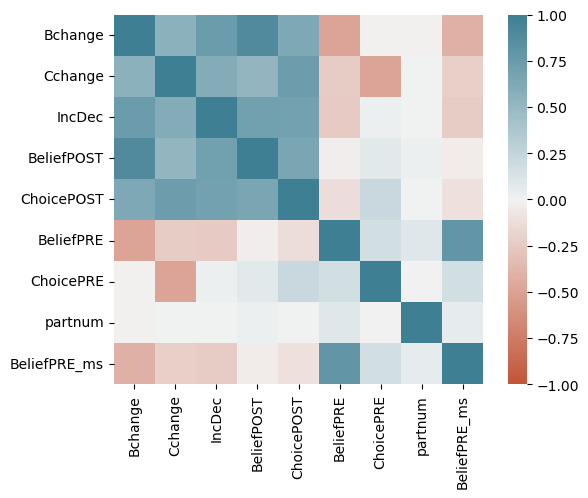

In [83]:
# look at these correlations in a plot (correlation matrix heatmap):

corr = df2.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

One way to detect multicollinearity is by using a metric known as the variance inflation factor (VIF), which measures the correlation and strength of correlation between the explanatory variables in a regression model.

In [84]:
#find design matrix for linear regression model using 'rating' as response variable
y, X = dmatrices('Cchange ~ Bchange+BeliefPRE+ChoicePRE', data=df2, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable
vif

,VIF,variable
0,15.706591,Intercept
1,1.324134,Bchange
2,1.368001,BeliefPRE
3,1.041683,ChoicePRE


Note: Ignore the VIF for the “Intercept” in the model since this value is irrelevant.

How to Interpret VIF Values
The value for VIF starts at 1 and has no upper limit. A general rule of thumb for interpreting VIFs is as follows:

A value of 1 indicates there is no correlation between a given explanatory variable and any other explanatory variables in the model.
A value between 1 and 5 indicates moderate correlation between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention.
A value greater than 5 indicates potentially severe correlation between a given explanatory variable and other explanatory variables in the model. In this case, the coefficient estimates and p-values in the regression output are likely unreliable.
Given that each of the VIF values for the explanatory variables in our regression model are close to 1, multicollinearity is not a problem in our example.

### 5. Residuals are independent

In [85]:
# check for autocorrelation
# to ensure the absence of autocorrelation we use Ljungbox test.
# Null Hypothesis: Autocorrelation is absent.
# Alternative Hypothesis: Autocorrelation is present.

min(diag.acorr_ljungbox(mdf.resid , lags = 40, return_df=False)[1])

KeyError: 1

In [ ]:
# because it seems from the test above that my residuals are not independent, one solution is to run a GLSAR instead
# GLSAR is a feasible generalized least squares with autocorrelated AR(p) errors
# this is how you run it:

Y = df2.Cchange
X = df2.Bchange
X = sm.add_constant(X)
model2 = sm.GLSAR(Y, X, rho=2)
results = model2.iterative_fit(maxiter=6)
model2.rho
print("Coefficients:\n", results.params)
print("Coefficient t-values\n", results.tvalues)
print("Coefficient t-tests?\n", results.t_test([[1, 0], [0, 1]]))

### 6. No bad outliers

In [ ]:
# Cook’s distance

# create instance of influence
influence = mdf.get_influence()

# get Cook's distance for each observation
cooks_distances, pval = influence.cooks_distance

# print Cook's distances (an array of values for Cook’s distance for each observation and a corresponding array of p-values)
# sigificant p-values means the outlier is bad
print(cooks_distances)
print(pval)

In [ ]:
# visualize the outliers to spot the bad ones
# consider removing the bad outliers to improve the model fit (but this decision depends on your research question)

plt.scatter(df2.Bchange, pval)
plt.show()

In [ ]:
# if you want to remove the sigificantly bad outliers (as determined by the pvalues of Cook's distnace) from the dataframe:
# uset the loc function to only keep the observations that are not significant outliers

df2 = df2.loc[pval>=0.05]

In [ ]:
# if your data has bad outliers but you don't want to remove them, run a robust linear model (RLM):

rlm_model = sm.RLM(df2.Cchange, df2.Bchange, M=sm.robust.norms.HuberT())
rlm_results = rlm_model.fit()
rlm_results.summary()

## Regression power analysis

Compute power: WebPower: https://webpower.psychstat.org/wiki/models/index